In [55]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sklearn.model_selection
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [56]:
dataset_path = 'Admission_Predict_Ver1.1.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
dataset = raw_dataset.copy() # Borrar el raw copy, es para poder hacer prints sobre esto y no tener datos distintos

# Split into vectors the dataset. y_all being the chance, x_all the other cols
# Y also gets categorized in 5 classes as output asks for.
bins = pd.cut(dataset.pop("Chance of Admit "), bins=np.array([0, 0.5, 0.65, 0.8, 0.9, 1]), labels=[0,1,2,3,4])
y_all = keras.utils.to_categorical(bins, num_classes=5)
x_all = dataset

# Split dataset into train and tests. 33% used as asked.
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.33, random_state=0)

In [66]:
y_all

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [59]:
def build_model():
  model = keras.Sequential([
    layers.BatchNormalization(input_shape=tuple([x_train.shape[1]])),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(rate=0.5),
    layers.Dense(5, activation=tf.nn.sigmoid)
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer='adadelta',
                metrics=['accuracy'])
  return model

In [60]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1_3 (Ba (None, 8)                 32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 32)                128       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 32)                128       
__________

In [61]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=200, validation_data=(x_valid, y_valid), verbose=1)

Train on 335 samples, validate on 165 samples
Epoch 1/200
335/335 [==============================] - 1s 2ms/sample - loss: 1.7821 - acc: 0.2239 - val_loss: 6.2954 - val_acc: 0.1576
Epoch 2/200
335/335 [==============================] - 0s 19us/sample - loss: 1.7911 - acc: 0.1791 - val_loss: 4.8357 - val_acc: 0.1576
Epoch 3/200
335/335 [==============================] - 0s 24us/sample - loss: 1.7680 - acc: 0.2179 - val_loss: 4.1529 - val_acc: 0.1576
Epoch 4/200
335/335 [==============================] - 0s 33us/sample - loss: 1.6908 - acc: 0.2716 - val_loss: 3.6884 - val_acc: 0.1576
Epoch 5/200
335/335 [==============================] - 0s 25us/sample - loss: 1.6811 - acc: 0.2657 - val_loss: 3.3984 - val_acc: 0.1576
Epoch 6/200
335/335 [==============================] - 0s 18us/sample - loss: 1.7000 - acc: 0.2776 - val_loss: 3.2464 - val_acc: 0.1576
Epoch 7/200
335/335 [==============================] - 0s 33us/sample - loss: 1.6973 - acc: 0.2806 - val_loss: 3.1094 - val_acc: 0.1576
Epo

Epoch 61/200
335/335 [==============================] - 0s 31us/sample - loss: 1.3579 - acc: 0.4149 - val_loss: 2.3953 - val_acc: 0.1576
Epoch 62/200
335/335 [==============================] - 0s 21us/sample - loss: 1.3621 - acc: 0.4388 - val_loss: 2.3943 - val_acc: 0.1576
Epoch 63/200
335/335 [==============================] - 0s 22us/sample - loss: 1.3303 - acc: 0.4090 - val_loss: 2.3959 - val_acc: 0.1576
Epoch 64/200
335/335 [==============================] - 0s 18us/sample - loss: 1.2750 - acc: 0.4537 - val_loss: 2.3987 - val_acc: 0.1576
Epoch 65/200
335/335 [==============================] - 0s 25us/sample - loss: 1.3059 - acc: 0.4597 - val_loss: 2.4094 - val_acc: 0.1576
Epoch 66/200
335/335 [==============================] - 0s 26us/sample - loss: 1.2881 - acc: 0.4149 - val_loss: 2.4019 - val_acc: 0.1576
Epoch 67/200
335/335 [==============================] - 0s 33us/sample - loss: 1.3063 - acc: 0.4030 - val_loss: 2.4087 - val_acc: 0.1576
Epoch 68/200
335/335 [===================

Epoch 121/200
335/335 [==============================] - 0s 18us/sample - loss: 1.1084 - acc: 0.4687 - val_loss: 3.4226 - val_acc: 0.1576
Epoch 122/200
335/335 [==============================] - 0s 26us/sample - loss: 1.0977 - acc: 0.4746 - val_loss: 3.4504 - val_acc: 0.1576
Epoch 123/200
335/335 [==============================] - 0s 19us/sample - loss: 1.0887 - acc: 0.5015 - val_loss: 3.4861 - val_acc: 0.1576
Epoch 124/200
335/335 [==============================] - 0s 24us/sample - loss: 1.1069 - acc: 0.4896 - val_loss: 3.5175 - val_acc: 0.1576
Epoch 125/200
335/335 [==============================] - 0s 23us/sample - loss: 1.0914 - acc: 0.5075 - val_loss: 3.5368 - val_acc: 0.1636
Epoch 126/200
335/335 [==============================] - 0s 19us/sample - loss: 1.1184 - acc: 0.4687 - val_loss: 3.5940 - val_acc: 0.2000
Epoch 127/200
335/335 [==============================] - 0s 27us/sample - loss: 1.0724 - acc: 0.4896 - val_loss: 3.6401 - val_acc: 0.1818
Epoch 128/200
335/335 [===========

Epoch 181/200
335/335 [==============================] - 0s 19us/sample - loss: 1.0325 - acc: 0.5313 - val_loss: 4.1850 - val_acc: 0.1333
Epoch 182/200
335/335 [==============================] - 0s 21us/sample - loss: 0.9772 - acc: 0.5343 - val_loss: 4.1666 - val_acc: 0.1576
Epoch 183/200
335/335 [==============================] - 0s 23us/sample - loss: 1.0101 - acc: 0.5075 - val_loss: 4.1625 - val_acc: 0.1394
Epoch 184/200
335/335 [==============================] - 0s 25us/sample - loss: 1.0229 - acc: 0.5254 - val_loss: 4.1553 - val_acc: 0.1333
Epoch 185/200
335/335 [==============================] - 0s 26us/sample - loss: 1.0629 - acc: 0.5045 - val_loss: 4.1348 - val_acc: 0.1576
Epoch 186/200
335/335 [==============================] - 0s 23us/sample - loss: 1.0192 - acc: 0.5164 - val_loss: 4.1262 - val_acc: 0.1394
Epoch 187/200
335/335 [==============================] - 0s 22us/sample - loss: 1.0390 - acc: 0.5164 - val_loss: 4.0881 - val_acc: 0.1333
Epoch 188/200
335/335 [===========

In [62]:
x_test = dataset
y_test = model.predict(x_test)

y_test

array([[8.85128975e-06, 8.67247581e-06, 6.65187836e-05, 9.99991179e-01,
        9.99995291e-01],
       [1.20699406e-04, 1.42663717e-04, 1.64598227e-03, 9.99807060e-01,
        9.99787927e-01],
       [1.70513988e-03, 2.29746103e-03, 3.25407982e-02, 9.95759487e-01,
        9.91614521e-01],
       ...,
       [3.06963921e-06, 4.61935997e-06, 3.38852406e-05, 9.99996185e-01,
        9.99998093e-01],
       [7.33256340e-04, 1.55681372e-03, 1.81946158e-02, 9.97912765e-01,
        9.96368229e-01],
       [5.70416451e-05, 1.07163010e-04, 9.13139491e-04, 9.99892592e-01,
        9.99885678e-01]], dtype=float32)

In [63]:
# Error cuadratico medio
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_all, y_test)
cm

0.45259348

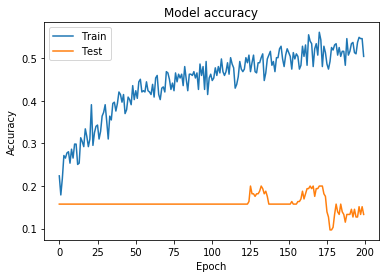

In [64]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

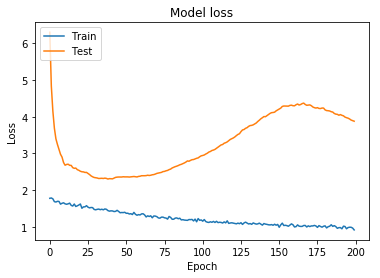

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()